Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Backpropagation

# Contents

- Perceptron

### Perceptron

This is the most fundamental type of element in a neural network. We have already seen what a perceptron is in the basics of neural networks section. However, we just scratched the surface. In this section, we will explore a perceptron in detail and explore a couple of simple problems it can solve. 

<img src="./pics/perceptron_visual.png"/>

By definition, a perceptron can only solve **linearly separable** problems. What is a _linearly separable_ problem ?

Text(0.5, 1.0, 'OR gate')

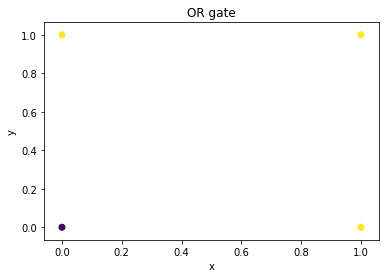

In [184]:
# OR gate
x = np.array([[1,0],
              [0,1],
              [0,0],
              [1,1]])
y   = np.array([1,1,0,1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("OR gate")

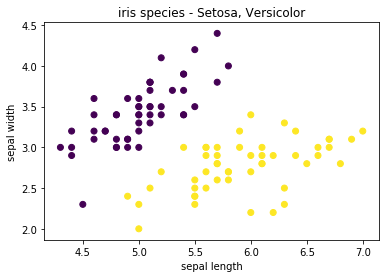

In [187]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()
data = iris.data

plt.scatter(data[0:100,0],data[0:100,1],c=iris.target[0:100])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("iris species - Setosa, Versicolor")
plt.savefig("iris.png")

In [107]:
import numpy as np

# AND gate
# x = np.array([[1,0],
#               [0,1],
#               [0,0],
#               [1,1]])
# y   = np.array([0,0,0,1])

# OR gate
x = np.array([[1,0],
              [0,1],
              [0,0],
              [1,1]])
y   = np.array([1,1,0,1])

x.shape[0]

4

In [108]:
w = np.random.normal(size=2)
b = np.random.normal()

# learning rate
alpha = 0.01
print( w, b)

[-1.49302005  0.10978818] 1.1187640243933938


In [109]:
cost = []
# number of epochs
for epoch in range(1000) :
    
    # for each row in x
    for row in range(x.shape[0]) :
        
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)
        cost.append((y[row] - y_hat)**2)
        # for each row calculate weights
        backward_prop(y_hat,row)

print ( w, b)
# print ( cost)




[0.00697995 0.17978818] -0.0012359756066070184


In [102]:
def forward_prop(row) :
    y_hat = np.dot(x[row],w) + b
    if y_hat > 0 :
        return 1
    else :
        return 0

In [103]:
def backward_prop(y_hat, row) :
    global b,w
    w[0]  = w[0] + alpha * (y[row] - y_hat) * x[row][0]
    w[1]  = w[1] + alpha * (y[row] - y_hat) * x[row][1]
    b     = b + alpha * (y[row] - y_hat) 

In [59]:
def predict(x) :
    y = []
    for row in x :
        y_pred = np.dot(row,w) + b
        if y_pred > 0 :
            y_pred = 1
        else :
            y_pred = 0
        y.append(y_pred)
    return y

In [222]:
forward_prop(3)

1

In [162]:
import numpy as np
 
x = np.linspace(0,10,100).reshape(-1,1)
y = np.linspace(0,10,100).reshape(-1,1)
 
xx,yy = np.meshgrid(x,y)

In [163]:
x_array = np.concatenate((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)),axis=1)

In [164]:
xx.ravel().reshape(-1,1).shape

(10000, 1)

In [165]:
x_array

array([[ 0.       ,  0.       ],
       [ 0.1010101,  0.       ],
       [ 0.2020202,  0.       ],
       ...,
       [ 9.7979798, 10.       ],
       [ 9.8989899, 10.       ],
       [10.       , 10.       ]])

In [166]:
b

-1.4103490169674031

In [167]:
y = predict(x_array)

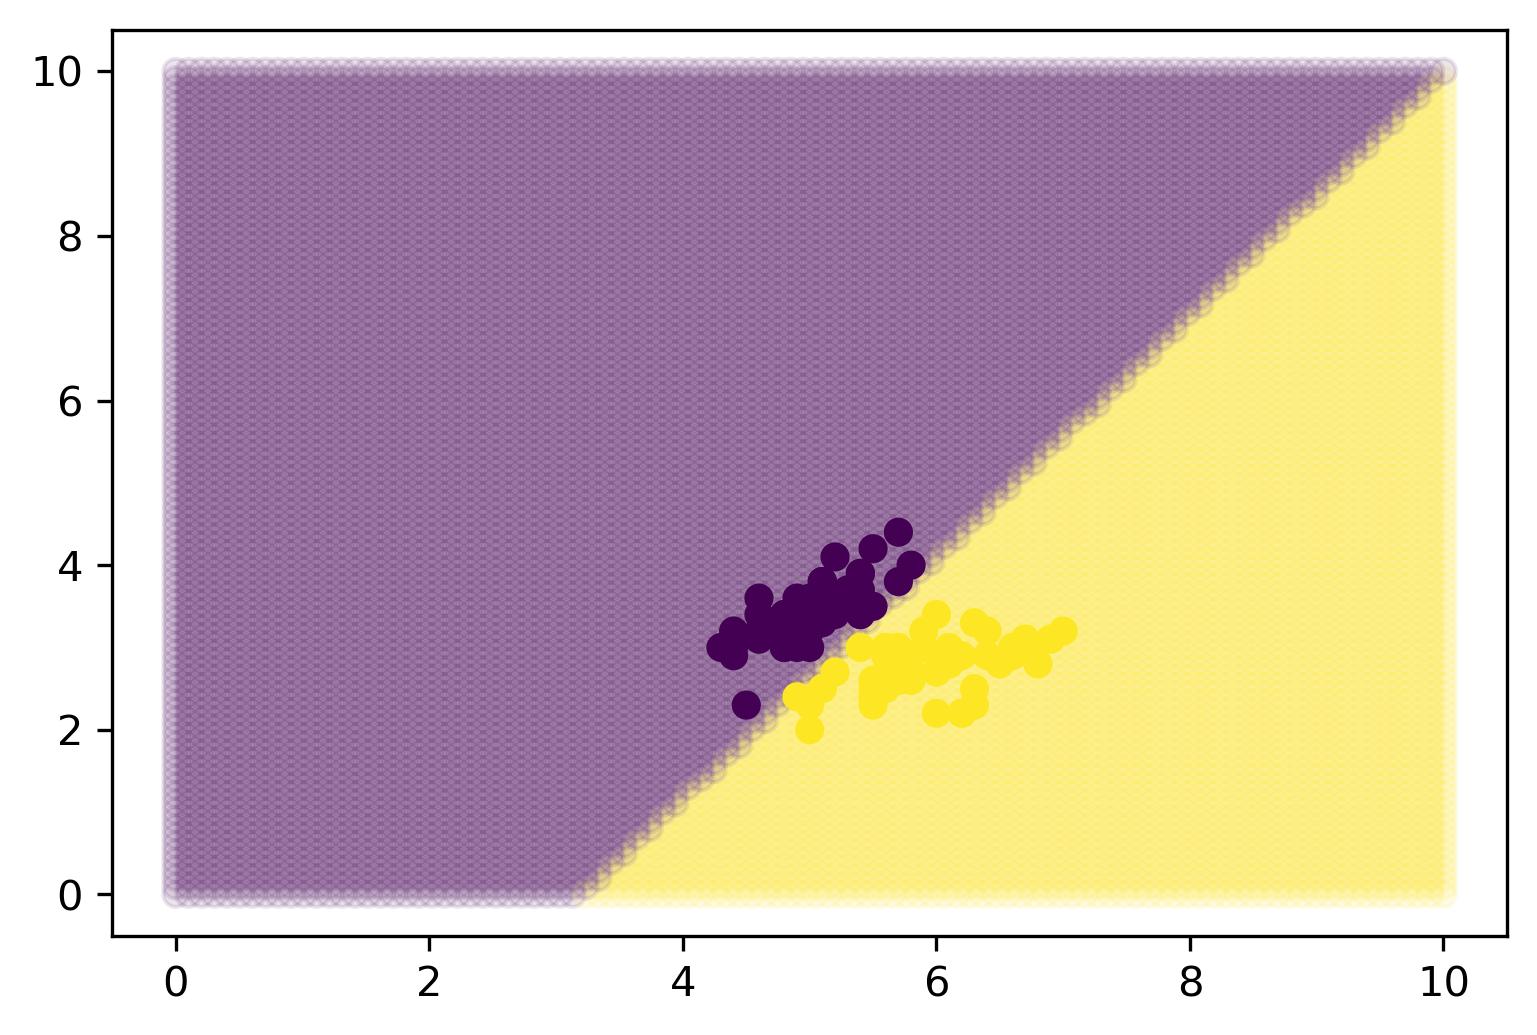

In [175]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300

plt.scatter(x_array[:,0],x_array[:,1],c=y,alpha=0.1)
plt.scatter(data[0:100,0],data[0:100,1],c=iris.target[0:100])

In [68]:
xx

array([[0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       ...,
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ],
       [0.        , 0.03030303, 0.06060606, ..., 2.93939394, 2.96969697,
        3.        ]])

In [161]:
w = np.random.normal(size=2)
b = np.random.normal()

# learning rate
alpha = 0.01
print( w, b)

# number of epochs
for epoch in range(1000) :
    
    # for each row in x
    for row in range(x.shape[0]) :
        
        # for each row in x, predict y_hat
        y_hat = forward_prop(row)
        # for each row calculate weights
        backward_prop(y_hat,row)

print ( w, b)

[1.67072853 0.77215314] -1.1503490169674029
[ 0.43872853 -0.29884686] -1.4103490169674031


In [120]:
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data

In [159]:
x = data[0:100,0:2]
y = iris.target[0:100]

In [160]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])